In [1]:
import tensorflow as tf #pip install tensorflow

In [2]:
mnist = tf.keras.datasets.mnist ## this is a handwritten character based on 28*28 sized images

In [3]:
#unpacking the dataset into train and test datasets 
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

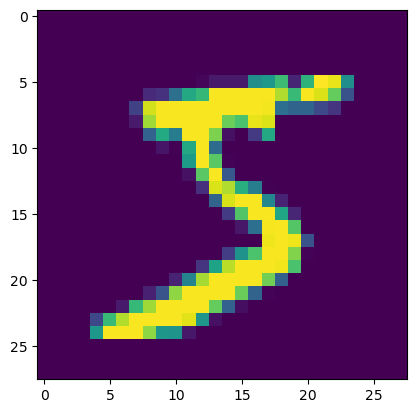

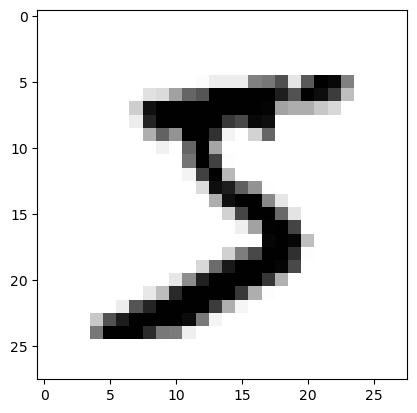

In [5]:

import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)


In [6]:
print(x_train[0]) #before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

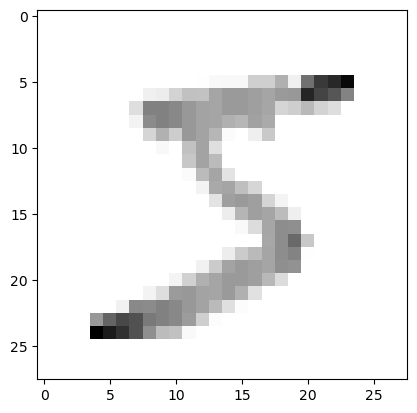

In [7]:
#normalizing the data | preprocessing step
# you might notice its a grey image and all values varies from 0 to 255 in order to normalize it 
x_train =  tf.keras.utils.normalize (x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [8]:
#after normalization
print(x_train[0]) # you can see all values are normalized 


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0])

5


In [10]:
## resizing the image to make it suitable for apply convolution operation
import numpy as np #pip install numpy
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)##increasing one dimension for kernel operation
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)##increasing one dimension for kernel operation
print("Training Sample dimension ",x_trainr.shape)
print("Testing Sample dimension ",x_testr.shape)

Training Sample dimension  (60000, 28, 28, 1)
Testing Sample dimension  (10000, 28, 28, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [12]:
mode1 = Sequential()

##first convolution layer 0 1 2 3 (60000,28,28,1) 28-3+1= 26x26
mode1.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))#only for first convolution layer to mention  input layer size 
mode1.add(Activation("relu"))##activation function to make it non-linear,<0,remove,>0 
mode1.add(MaxPooling2D(pool_size=(2,2)))##MAxpooling single maximum value of 2*2,

## second convolution layer 26-3+1= 24x24
mode1.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))#only for first convolution layer to mention  input layer size 
mode1.add(Activation("relu"))##activation function to make it non-linear,<0,remove,>0 
mode1.add(MaxPooling2D(pool_size=(2,2)))##MAxpooling single maximum value of 2*2,

## third convolution layer 
mode1.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))#only for first convolution layer to mention  input layer size 
mode1.add(Activation("relu"))##activation function to make it non-linear,<0,remove,>0 
mode1.add(MaxPooling2D(pool_size=(2,2)))##MAxpooling single maximum value of 2*2,

## fully connecting layer 20*20 =400
mode1.add(Flatten())### before using fully connected layer ,need to flatten so that 2D to 1D
mode1.add(Dense(64)) # neural network layer 
mode1.add(Activation("relu"))

#Fully Connected layer
mode1.add(Dense(32))
mode1.add(Activation("relu"))

##last fully connected layer ,output must be equal to the number of classes 
mode1.add(Dense(10))##last dense layer must be 10
mode1.add(Activation('softmax'))##activation function is changed to softmax





In [13]:
mode1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [14]:
print("total training samples",len(x_trainr))

total training samples 60000


In [15]:
mode1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [16]:
training_history=mode1.fit(x_trainr,y_train,epochs=5,validation_split=0.3)##training my model

Epoch 1/5


1313/1313 [==============================] - 11s 7ms/step - loss: 0.3380 - accuracy: 0.8949 - val_loss: 0.1214 - val_accuracy: 0.9609
Epoch 2/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1024 - accuracy: 0.9686 - val_loss: 0.0907 - val_accuracy: 0.9718
Epoch 3/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0724 - accuracy: 0.9781 - val_loss: 0.0704 - val_accuracy: 0.9783
Epoch 4/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0558 - accuracy: 0.9828 - val_loss: 0.0614 - val_accuracy: 0.9823
Epoch 5/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0450 - accuracy: 0.9856 - val_loss: 0.0637 - val_accuracy: 0.9809


In [17]:
##evaluating on testing dataset MNIST
test_loss, test_acc = mode1.evaluate(x_testr,y_test)
print("Test loss on 10000 test samples",test_loss)
print("Validation Accuracy on 10000 test samples",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0616 - accuracy: 0.9817
Test loss on 10000 test samples 0.06159907951951027
Validation Accuracy on 10000 test samples 0.9817000031471252


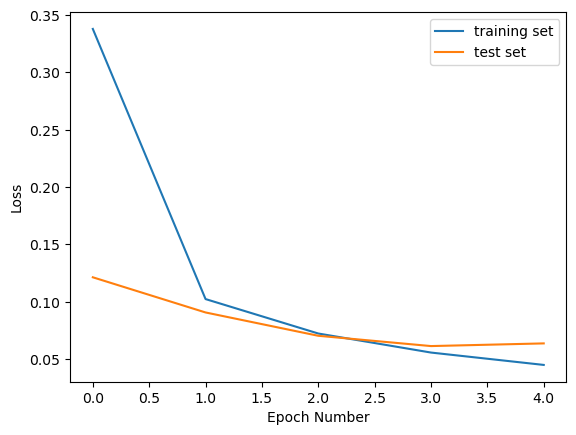

In [18]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

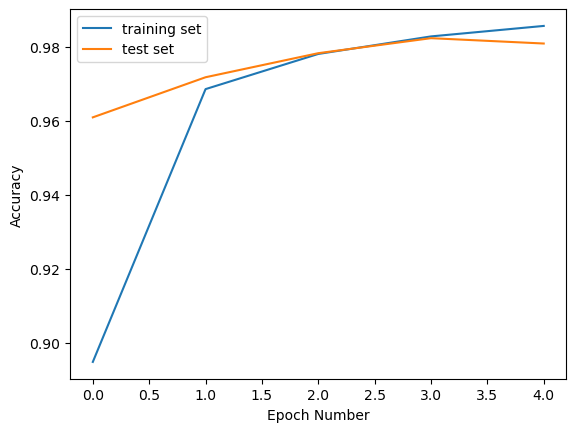

In [19]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [20]:
from matplotlib import pyplot as plt

In [21]:
#predictions = new_model.predict([x_test]) ##there is a specialized method for effeciently saving your model 
predictions = mode1.predict([x_testr])

313/313 [==============================] - 1s 4ms/step


In [22]:
print (predictions)

[[1.8553818e-08 4.4331880e-04 1.3359380e-04 ... 9.9941182e-01
  4.9281488e-07 1.3939652e-06]
 [2.9937337e-06 3.3056615e-06 9.9996674e-01 ... 8.3858176e-06
  1.0792935e-05 9.0528204e-08]
 [3.0373985e-06 9.9988234e-01 9.8163891e-06 ... 3.8302837e-06
  4.0919920e-05 2.8852654e-07]
 ...
 [2.8969604e-09 2.1940757e-06 8.4323117e-09 ... 2.4906540e-06
  3.9146880e-06 7.7462319e-05]
 [1.4103137e-05 7.9804590e-09 1.3139790e-07 ... 3.9452425e-10
  3.9889323e-06 8.6317277e-06]
 [8.6374651e-04 1.4047585e-07 8.8457882e-06 ... 2.0965102e-07
  1.1998487e-05 1.8243372e-04]]


In [23]:
## in  order to understand ,convert the predictions from one hot encoding , we need to use numpy for that
print(np.argmax(predictions[0]))

7


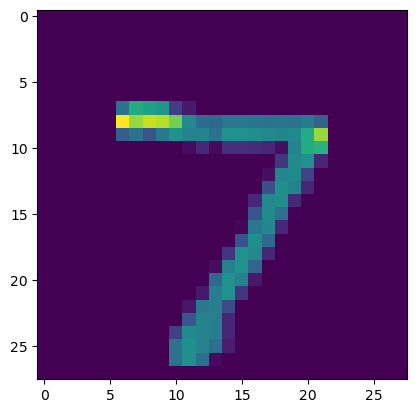

In [24]:
### now to check that is our answer is true or not 
plt.imshow(x_test[0])

In [25]:
## in order to understand ,convert the predictions from one hot encoding , we need to use numpy for that
print(np.argmax(predictions[110])) ## so actually argmax will return the maximum value index and final value of it 

8


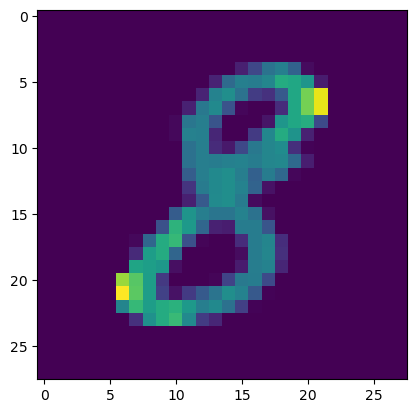

In [26]:
plt.imshow(x_test[110])

In [27]:
import cv2 ## pip install openc-python

In [28]:
import numpy as np

In [29]:
from IPython import display

In [33]:
file_path = input("8.png")

8.png 8.png


In [34]:
img=cv2.imread('8.png')

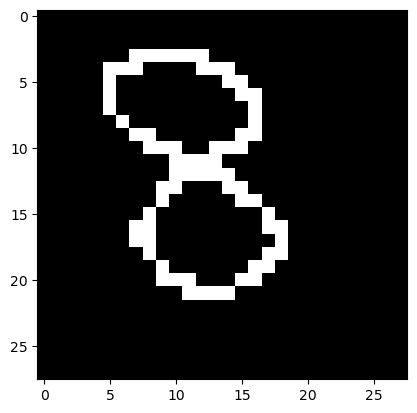

In [35]:
plt.imshow(img)

In [36]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [37]:
gray.shape

(28, 28)

In [38]:
resized = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)


In [39]:
resized.shape

(28, 28)

In [40]:
newimg = tf.keras.utils.normalize (resized,axis=1)

In [41]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [42]:
newimg.shape

(1, 28, 28, 1)

In [43]:
predictions = mode1.predict(newimg)

1/1 [==============================] - 0s 61ms/step


In [44]:
print (np.argmax(predictions)) 

3


In [45]:
#Predicting First 10 test images
pred = mode1.predict(x_testr[:10])
# print(pred)
p=np.argmax(pred, axis=1)
print(p)
print(y_test[:10])

1/1 [==============================] - 0s 23ms/step
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


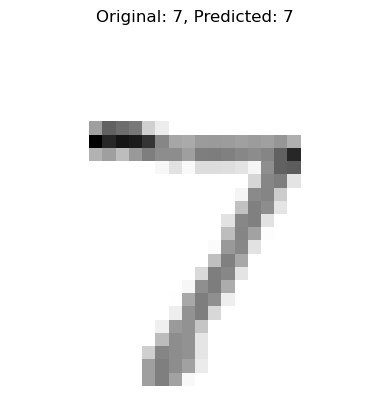

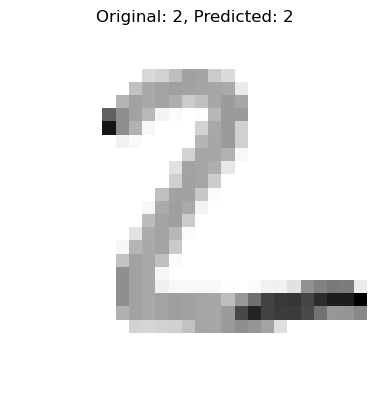

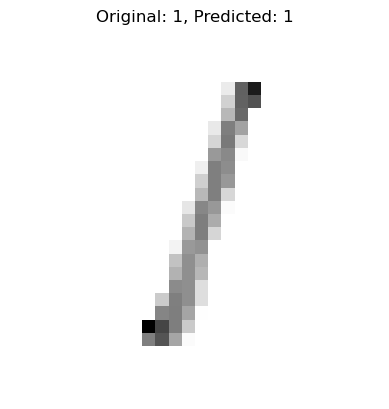

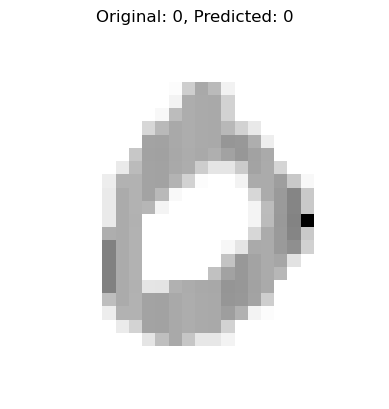

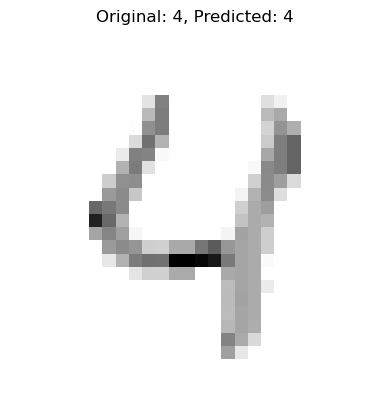

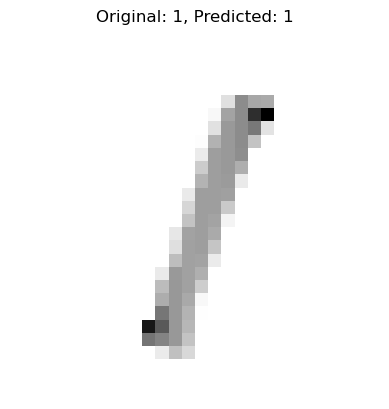

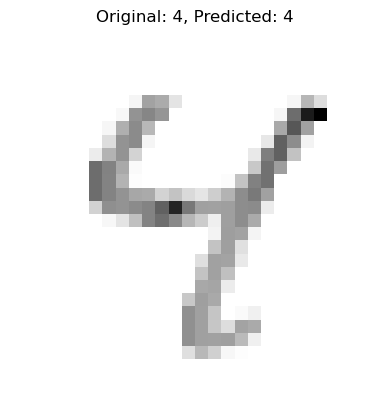

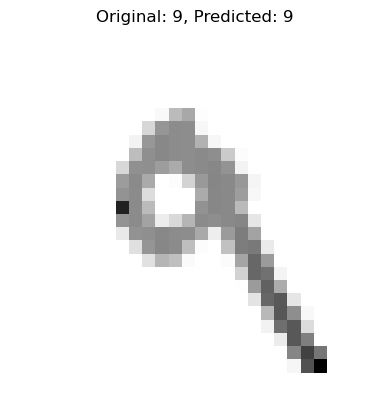

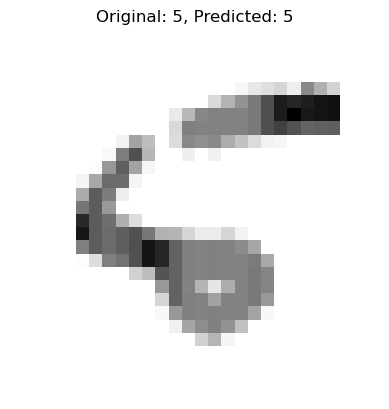

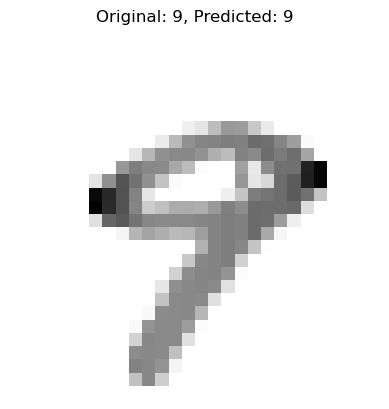

<Figure size 640x480 with 0 Axes>

In [46]:
#Visualizing prediction
for i in range(10):
  plt.imshow(x_testr[i].reshape((28,28)), cmap='binary')
  plt.title("Original: {}, Predicted: {}".format(y_test[i], p[i]))
  plt.axis("Off")
  plt.figure()
